In [149]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 12. 데이터 시각화</font><b>

- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리, Pandas 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능. groupby 기능을 추가한 라이브러리
# 1. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/pyplot_summary.html
## 1.1. 패키지 import 및 기본 설정

In [2]:
import matplotlib.pyplot as plt
#브라우저 내 출력
%matplotlib inline
#저장 시 해상도 개선
%config InlineBackend.figure_format = 'retina'
#한글 설정 for Windows
plt.rc('font', family='Malgun Gothic') #윈도우즈
#plt.rc('font', family='Apple Gothic') #맥OS
plt.rc('axes', unicode_minus = False) #축의 마이너스(-) 깨짐 방지
# warning message 안 보이게
import warnings
warnings.filterwarnings(action='ignore')

## 1.2. 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장

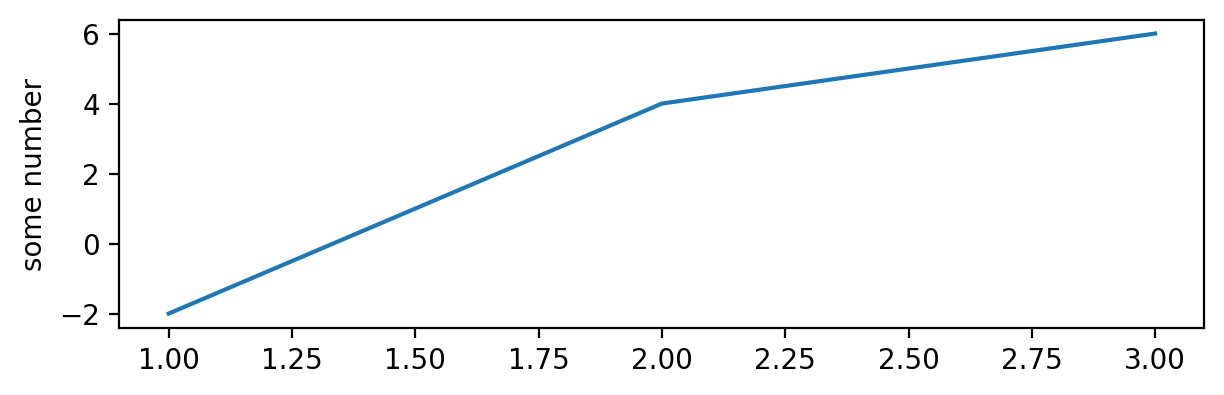

In [7]:
#1.
x = [1, 2, 3]
y = [-2, 4, 6]
#2. 그래프객체 생성 사이즈는 inch 단위
plt.figure(figsize=(7, 2))
#3.
plt.plot(x, y)
#4.
plt.ylabel('some number')
#5.
plt.savefig('data/ch12.png', bbox_inches='tight')
#plt.show()

## 1.3. 그래프 영역 나누기
### 1.3.1. subplot() 함수로 서브플롯 추가

In [8]:
import numpy as np
x = np.linspace(0, 9.9, 100)
#x = np.arange(0,10,0.1)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

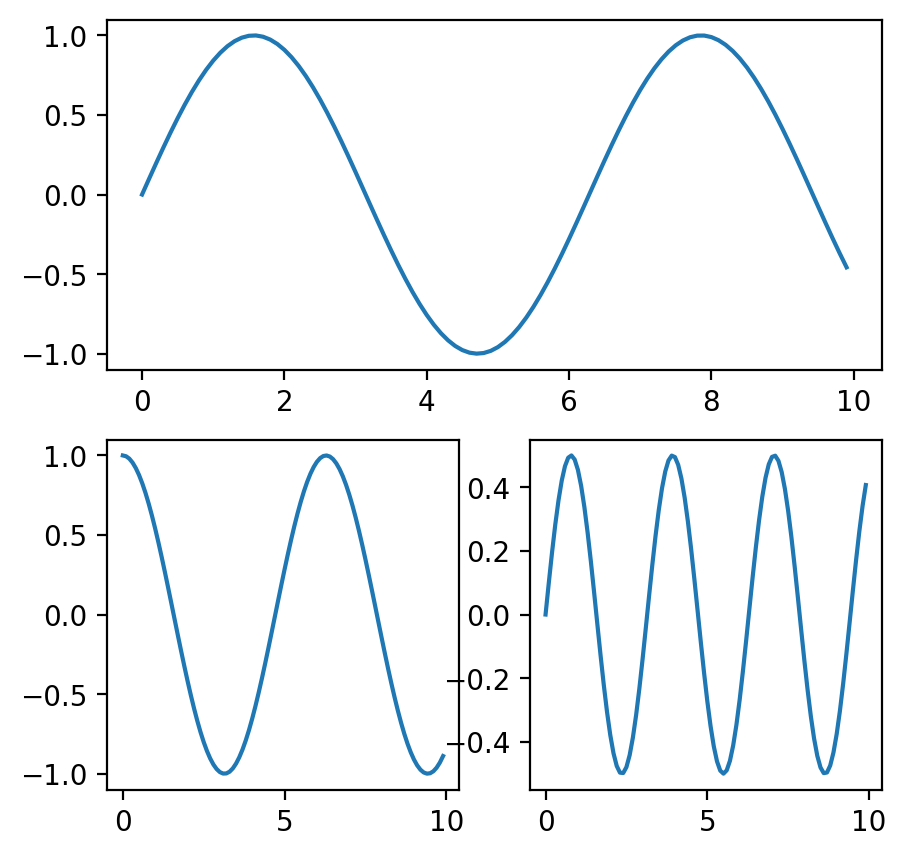

In [13]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) #2행 1열로 subplot에서 1번째 subplot은 다음과 같이
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) #2행 2열 subplot들 중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(224) #2행 2열 subplot들 중 4번째 subplot
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

### 1.3.2. subplots() 함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 p.14)
- https://wikidocs.net/92085

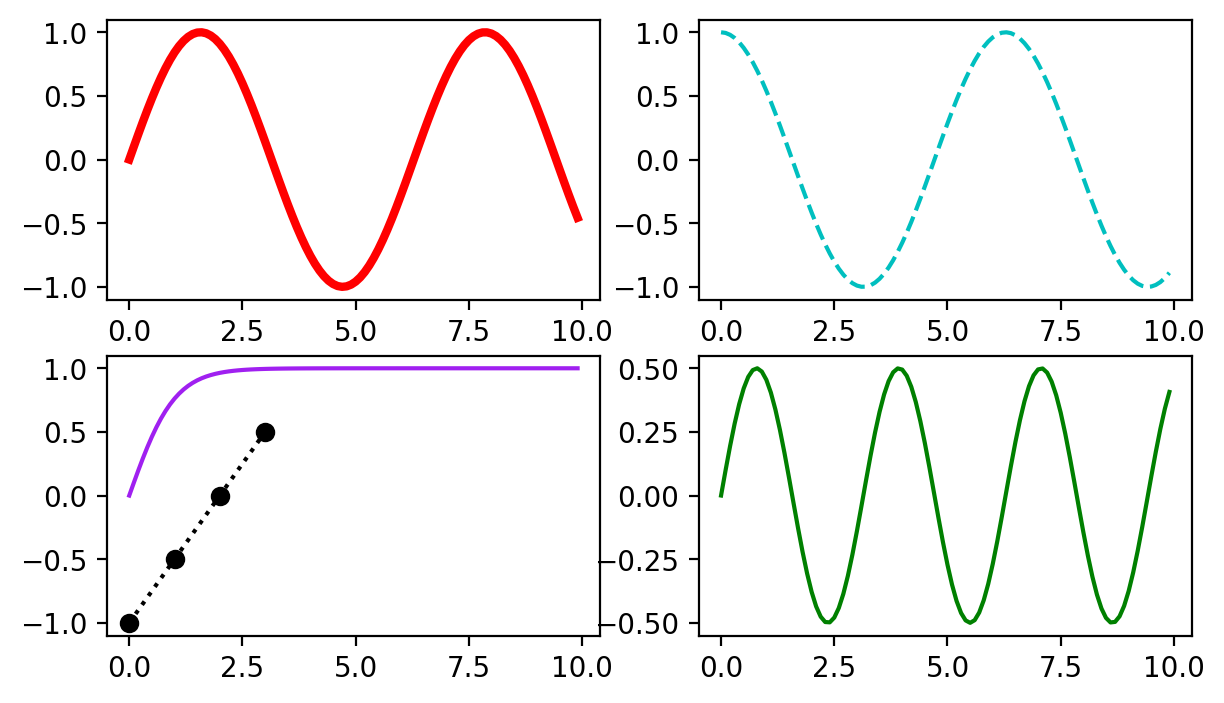

In [28]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=3)
axes[0,1].plot(x, np.cos(x), 'c--') #c='c', linestyle='--'
axes[1,0].plot(x, np.tanh(x), '#A020F0')
axes[1,0].plot([0,1,2,3],[-1, -0.5, 0, 0.5], 'ko:') #k: black, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'g-')
plt.show()

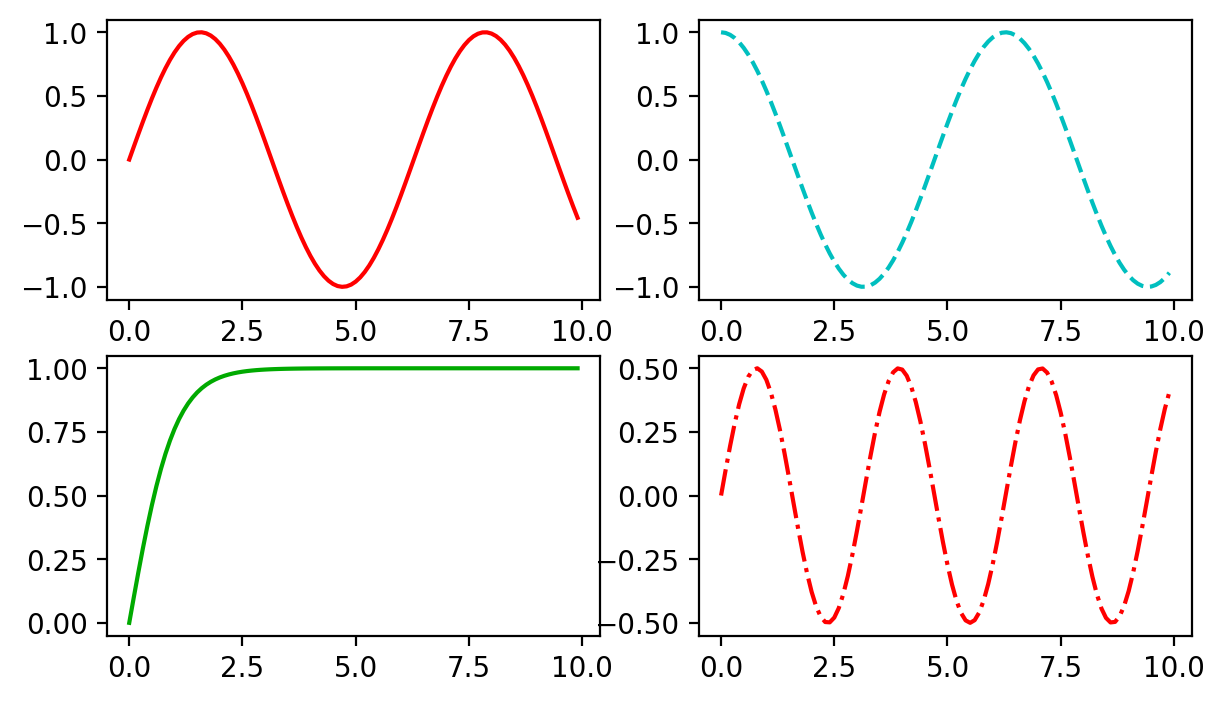

In [30]:
# 2행 2열 서브플롯
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(2,2,figsize=(7,4))
list(enumerate(axes.flat)) ###
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

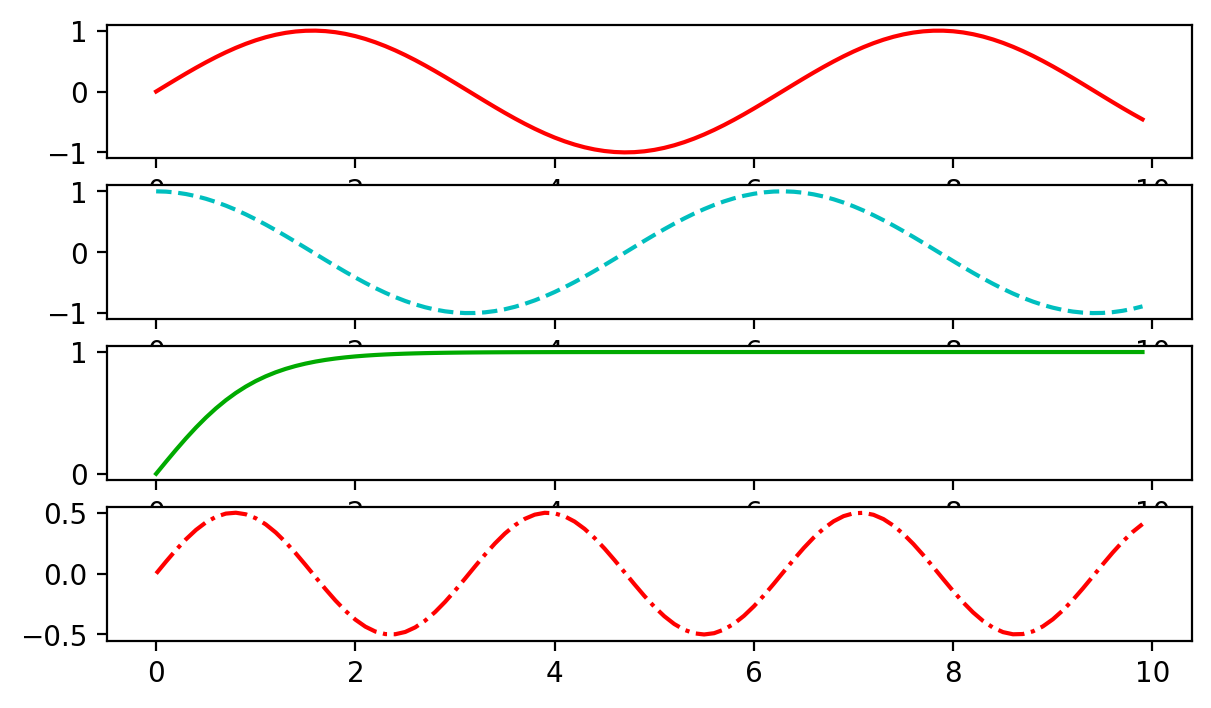

In [31]:
# 4행 1열 서브플롯
func = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4,1,figsize=(7,4))

for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4. 다양한 그래프 그리기
### 1.4.1. pyplot 함수들 (교안 p.16)
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html
### 1.4.2. matplotlib.pyplot.plot() : 선그래프
### 1.4.3. pandas.DataFrame.plot()
- plt.__(x, y, fmt)
- df.plot(x = None, y = None, kind = 'line', figsize = None, title = None, grid = None)
    * kind : line(기본값), scatter(점도표), bar, barh(가로막대), density, hist, pie(한 컬럼만)

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
29,4.7,3.2,1.6,0.2,setosa


* 범례 옮기기 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안 p. 20)

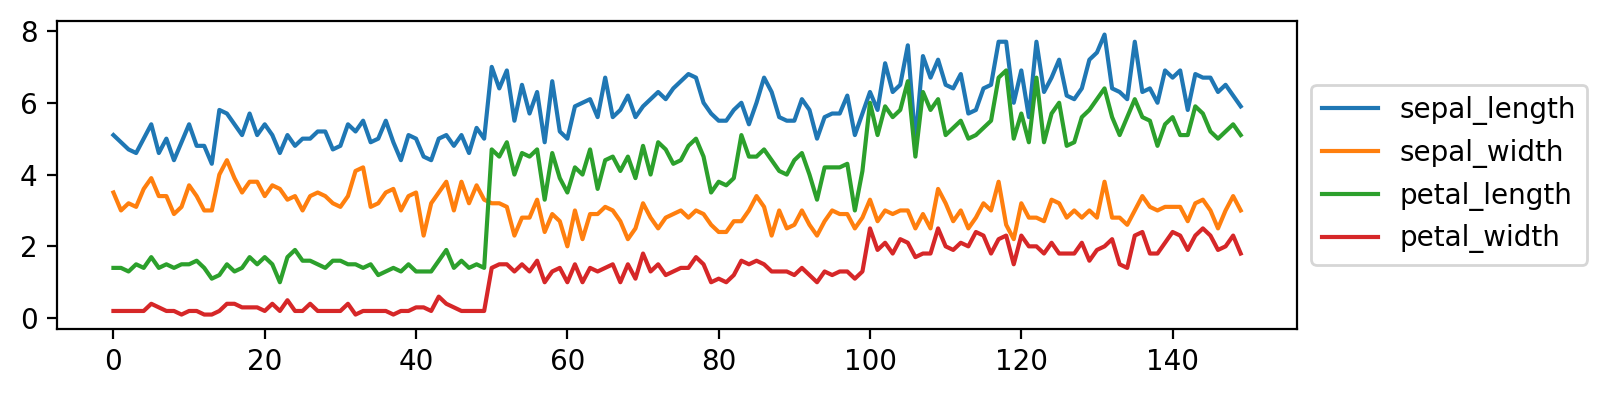

In [11]:
#plt.figure(figsize=(8,2))
#plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(8,2))
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #legend style ex1
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #legend style ex2
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #legend style ex3
plt.show()

<Axes: title={'center': 'IRIS Box Plot'}, ylabel='y-value'>

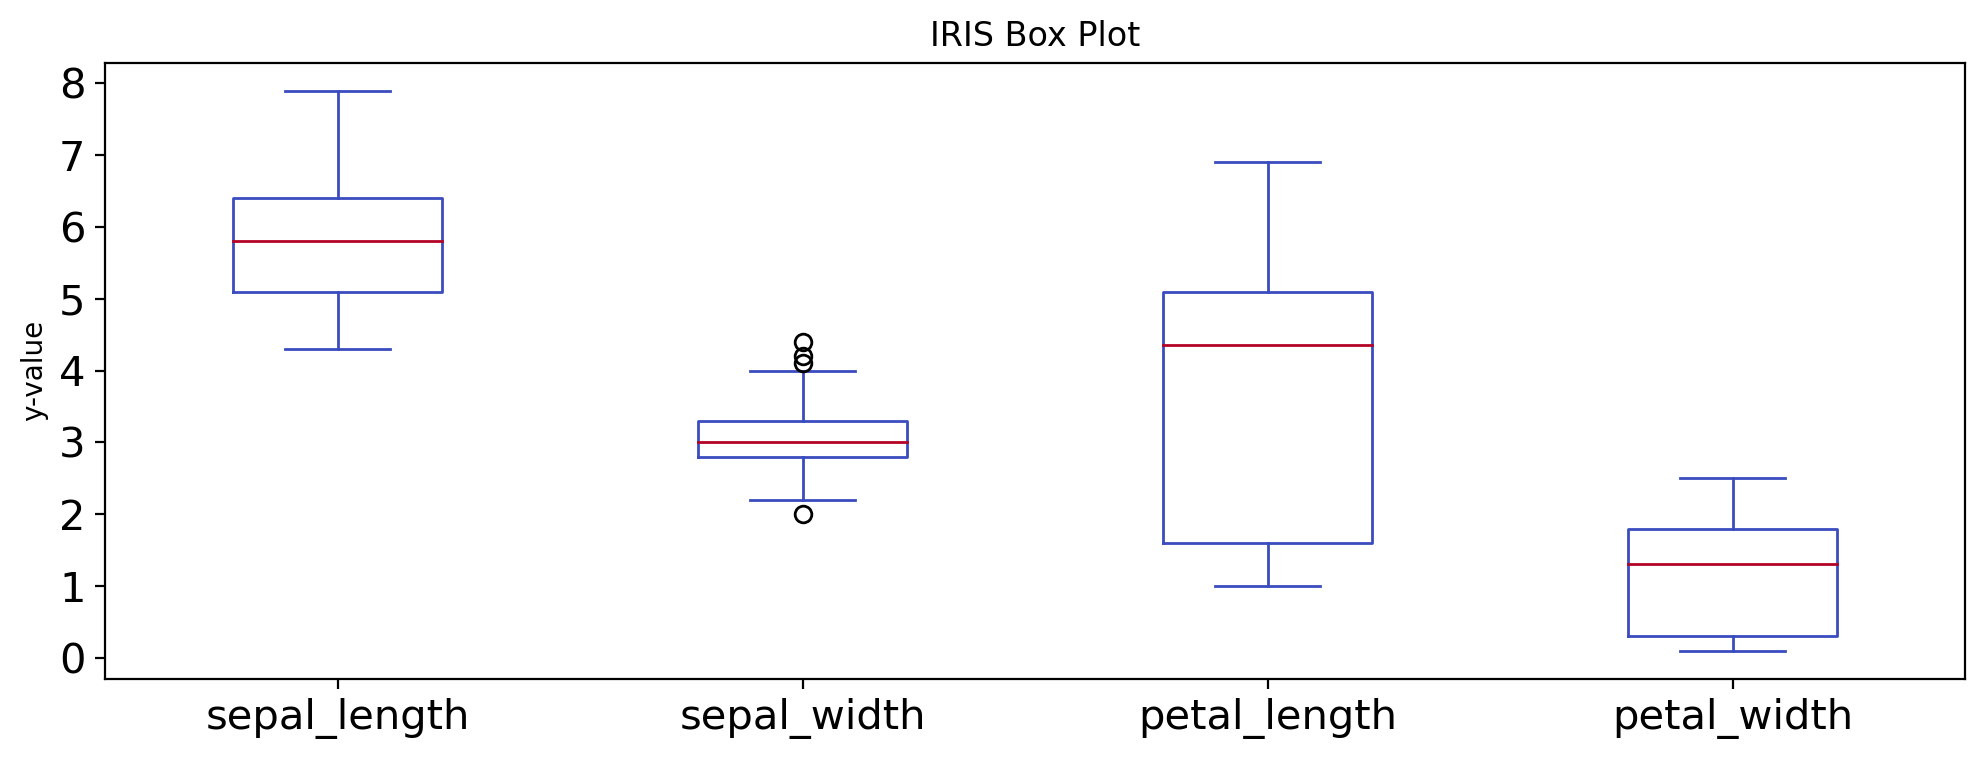

In [18]:
iris.plot(kind='box', figsize=(12,4), title='IRIS Box Plot', ylabel='y-value', fontsize=15, colormap='coolwarm')

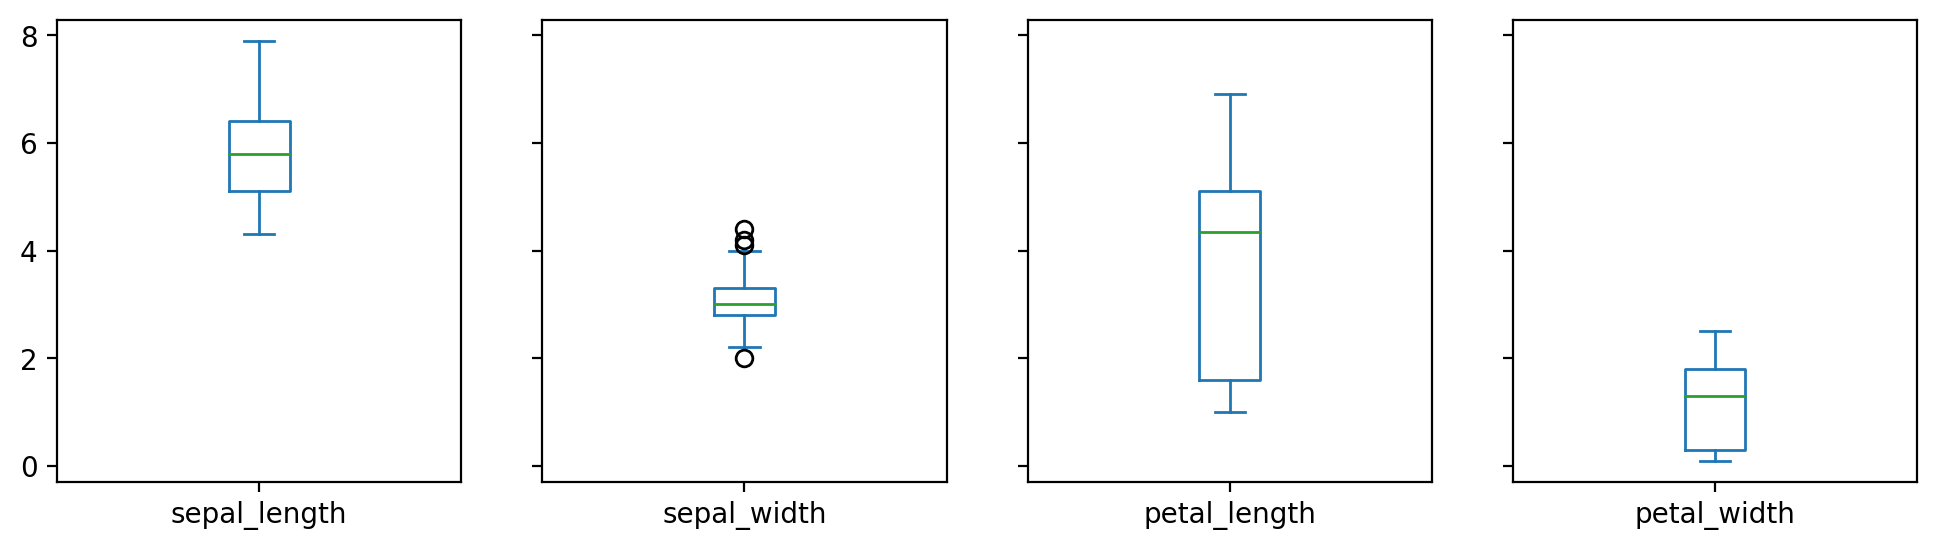

In [22]:
iris.plot(kind='box', figsize=(12,3), subplots=True, sharey=True) #sharey, sharex 축 공유
plt.show()

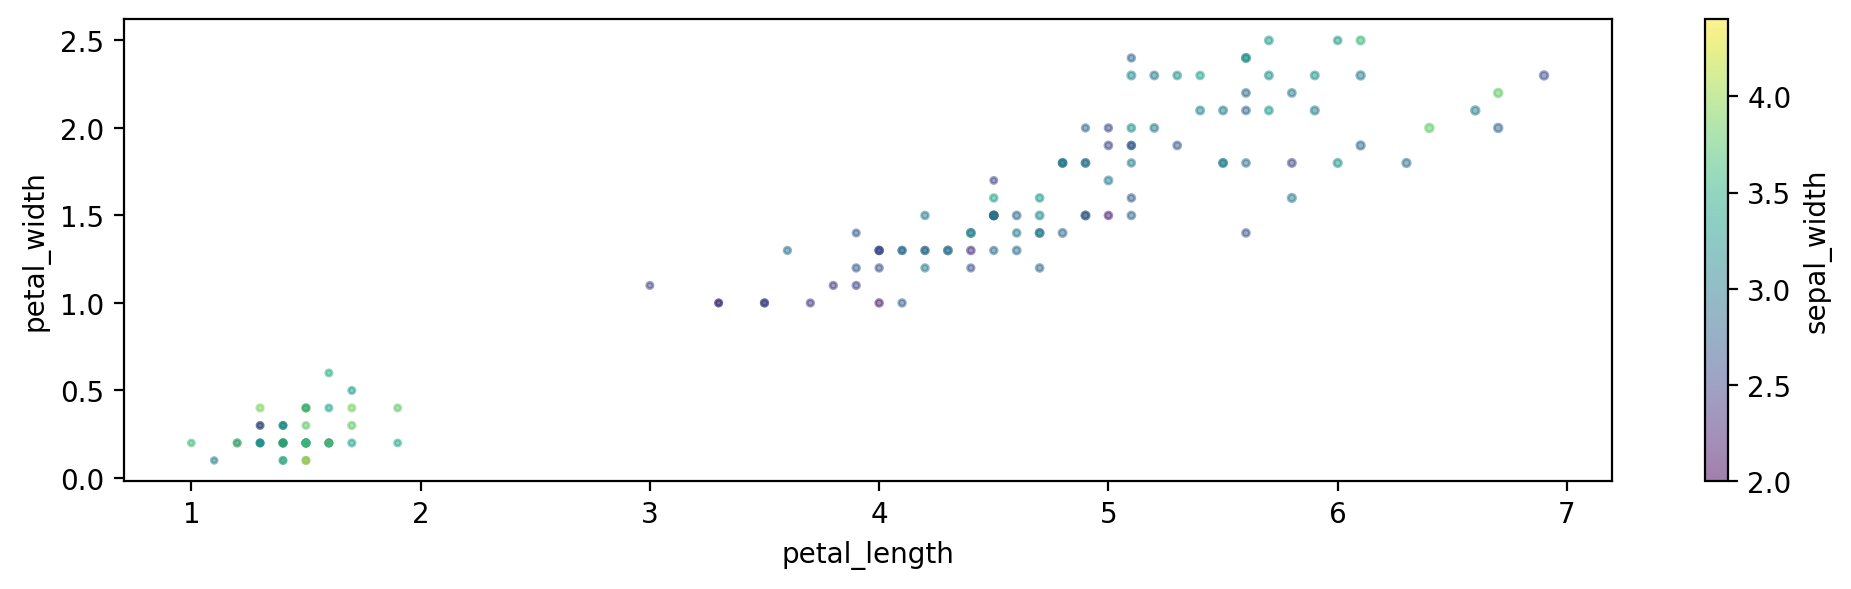

In [37]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', 
          s='sepal_length', c='sepal_width', 
          figsize=(12,3), alpha=0.5)
plt.show()

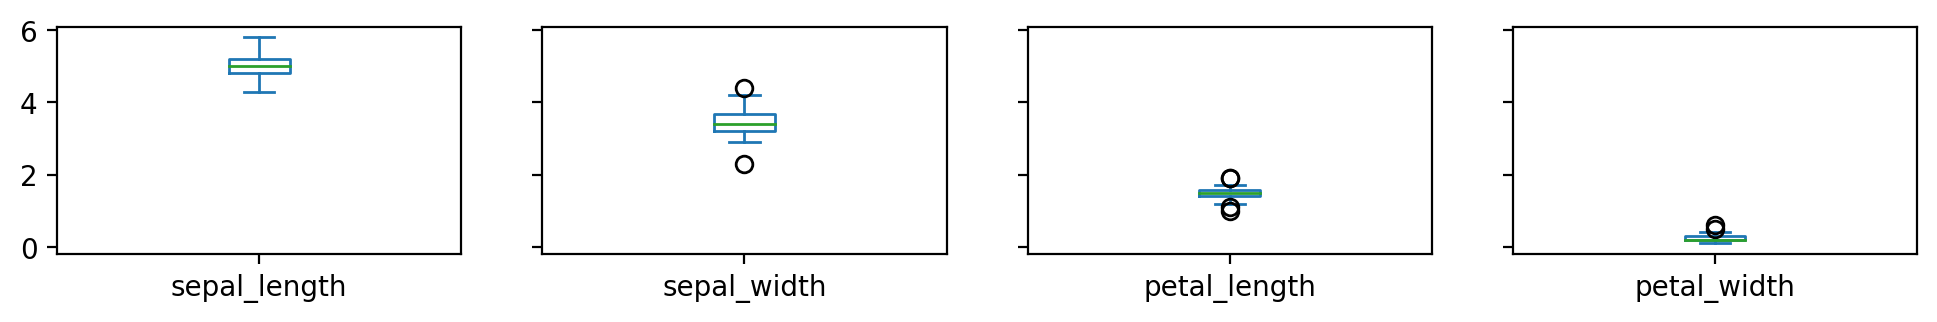

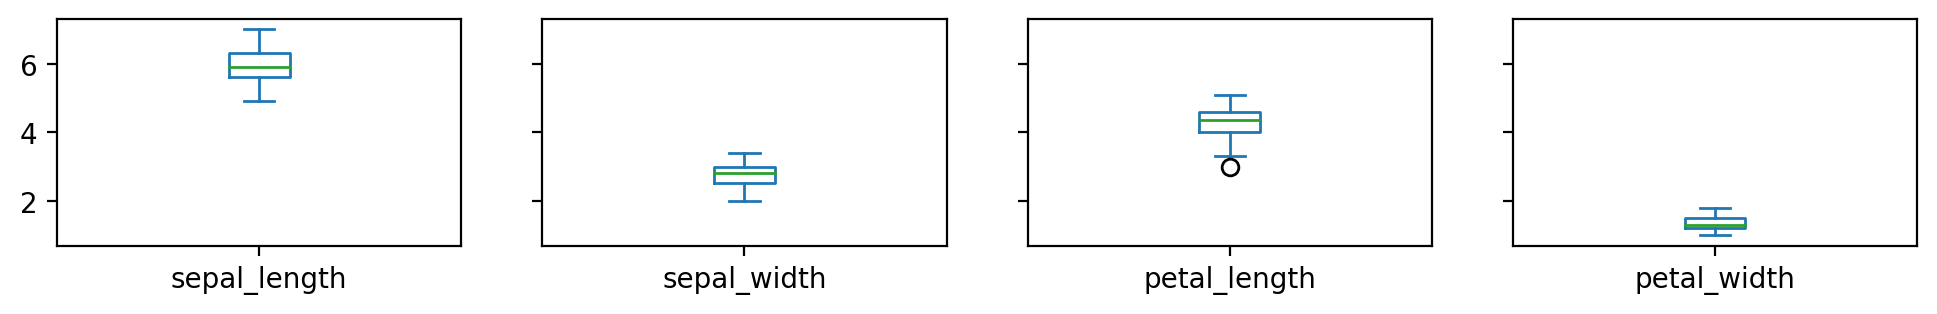

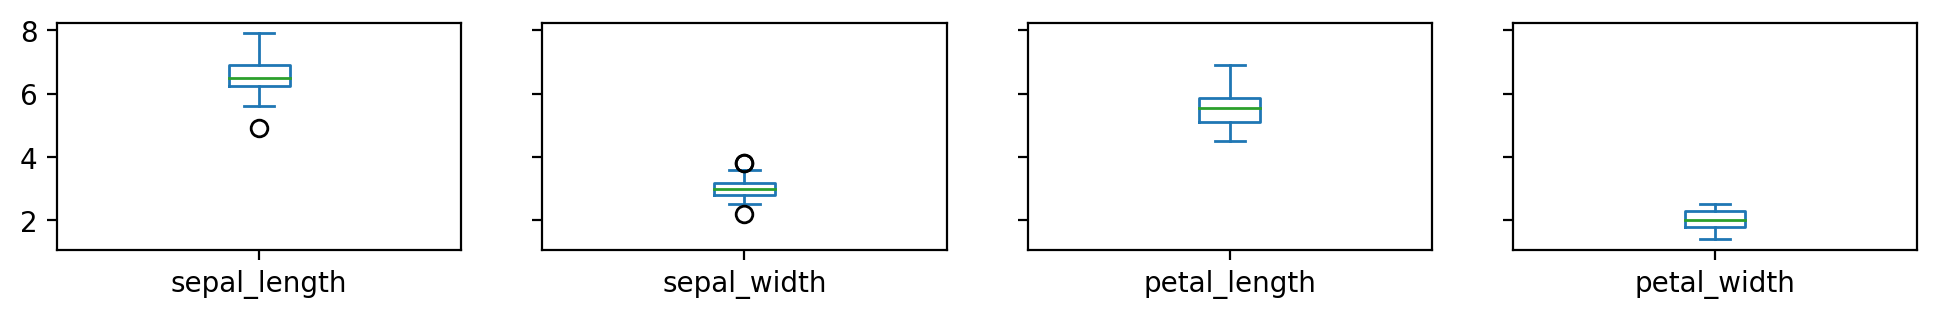

In [35]:
#종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(12,5),
                            subplots=True,
                            layout=(3,4),
                            sharey=True)
plt.show()

### 1.4.4. plt.scatter(): 산점도

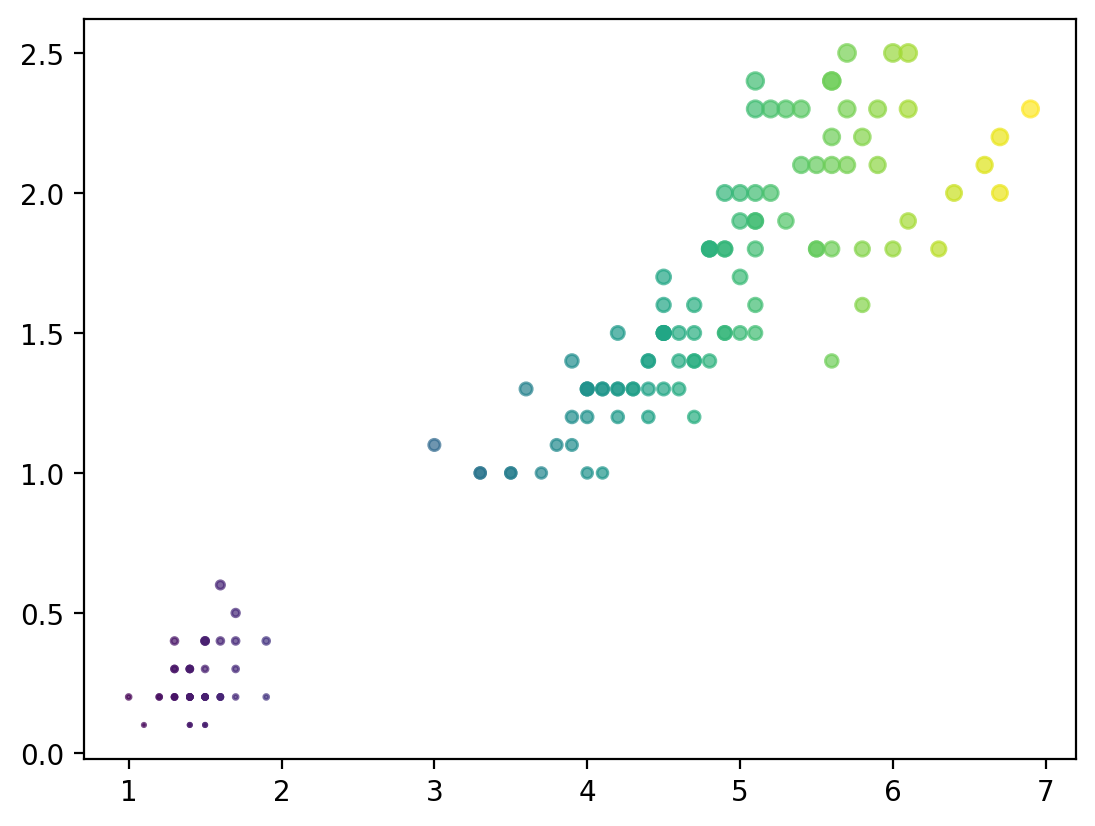

In [41]:
plt.scatter(iris.petal_length, iris.petal_width,
           c = iris.petal_length*20, s= iris.petal_width*15,
           alpha=0.7)

## 1.5. 그 외 그래프 그리기
### 1.5.1. boxplot vs. violinplot
- boxplot : 분포를 알 수 없다는 단점

<function matplotlib.pyplot.show(close=None, block=None)>

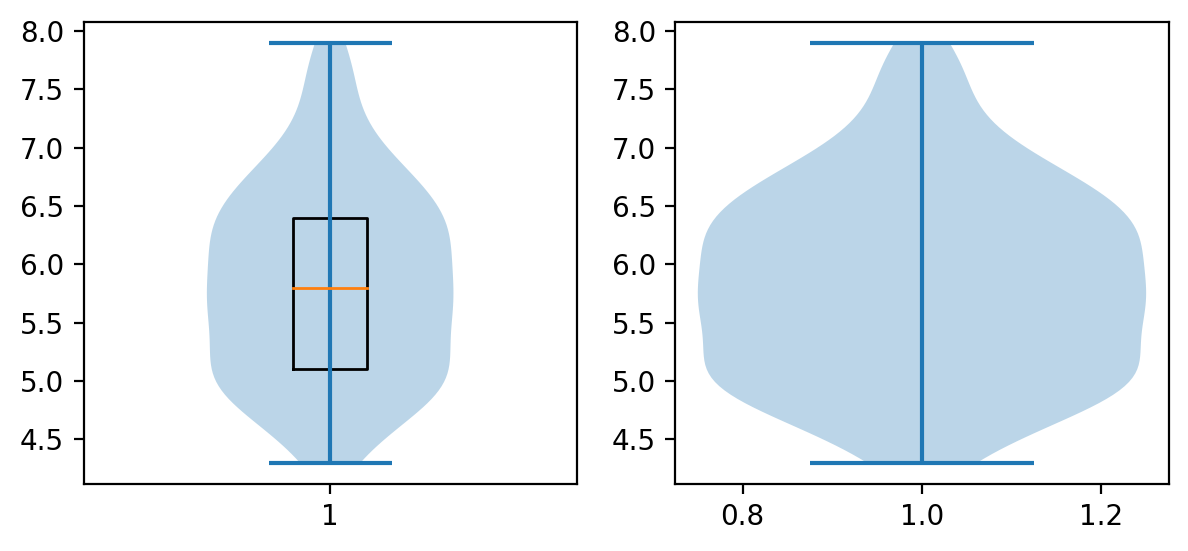

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show

### 1.5.2. bar(), barh()

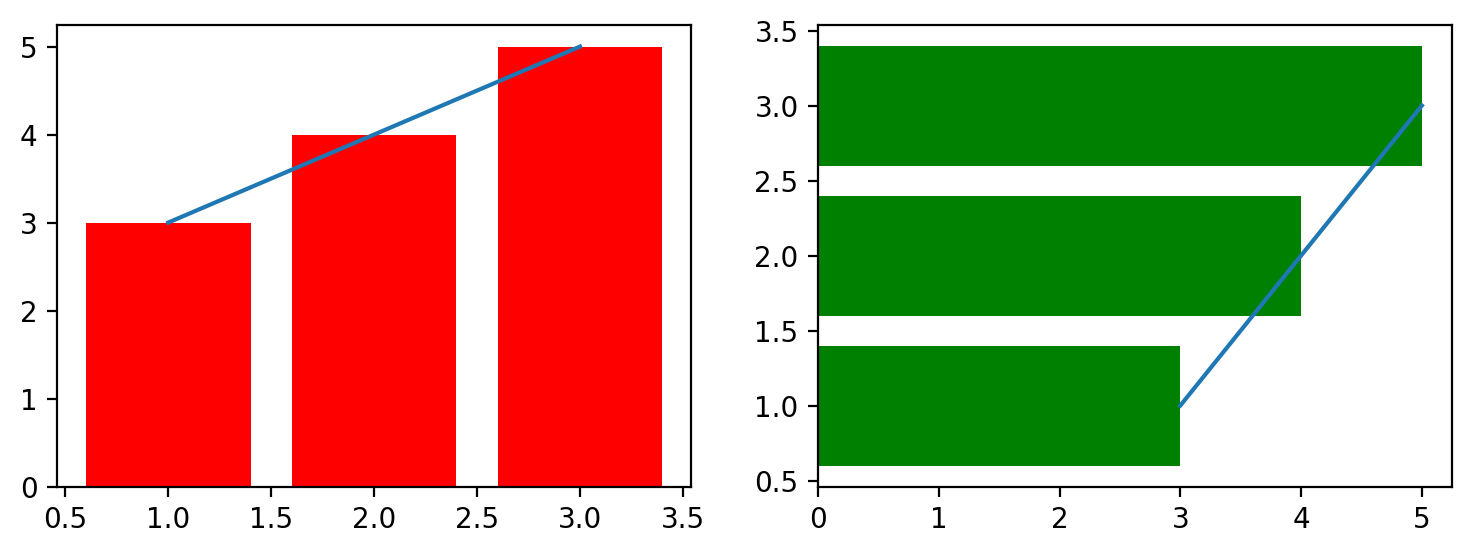

In [50]:
x = [1, 2, 3]
y = [3, 4, 5]
fig, axes = plt.subplots(ncols=2, figsize=(9,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color ='g')
axes[1].plot(y, x)

### 1.5.3. hist - 도수분포표, 히스토그램

(array([ 4.,  5.,  7., 16.,  9.,  5., 13., 14., 10.,  6., 10., 16.,  7.,
        11.,  4.,  2.,  4.,  1.,  5.,  1.]),
 array([4.3 , 4.48, 4.66, 4.84, 5.02, 5.2 , 5.38, 5.56, 5.74, 5.92, 6.1 ,
        6.28, 6.46, 6.64, 6.82, 7.  , 7.18, 7.36, 7.54, 7.72, 7.9 ]),
 [<matplotlib.patches.Polygon at 0x1d3b78b5270>])

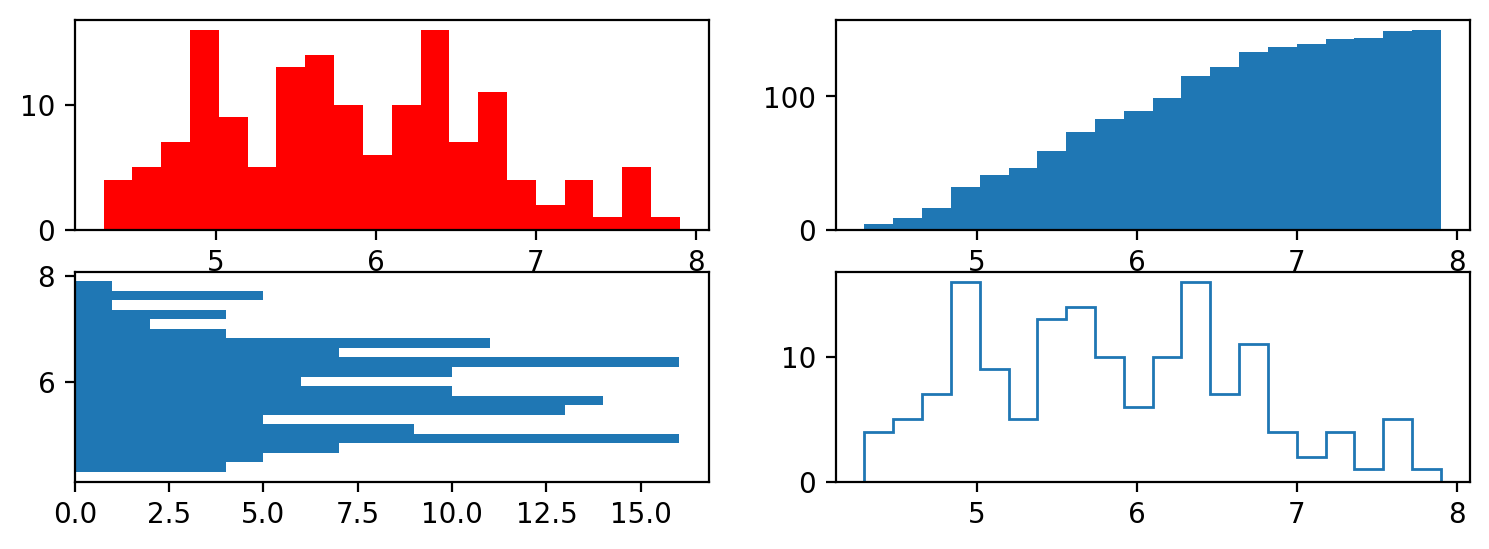

In [57]:
#히스토그램, pie그래프 : 1차원 데이터만
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,3))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') #히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) #누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') #축 변경
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') #축 변경

### 1.5.4. axvline(), axhline(), fill(), fill_between()

In [58]:
import numpy as np

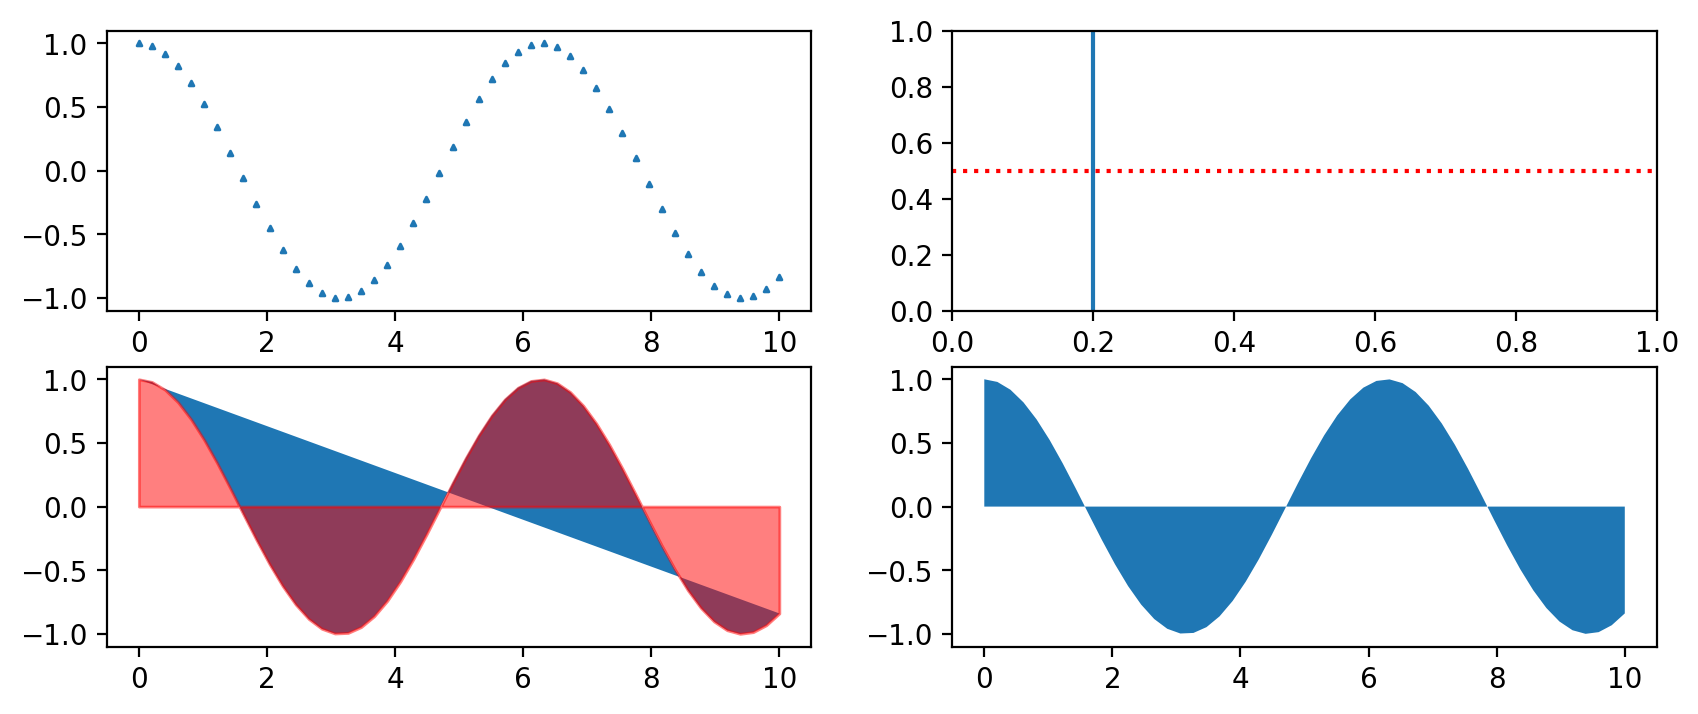

In [61]:
x = np.linspace(0, 10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,4))
axes[0,0].scatter(x, y, s=3, marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r', linestyle=':')
axes[1,0].fill(x, y)
axes[1,0].fill_between(x, y, color='r', alpha=0.5)
axes[1,1].fill_between(x, y)

### 1.5.5. pie
- 1차원

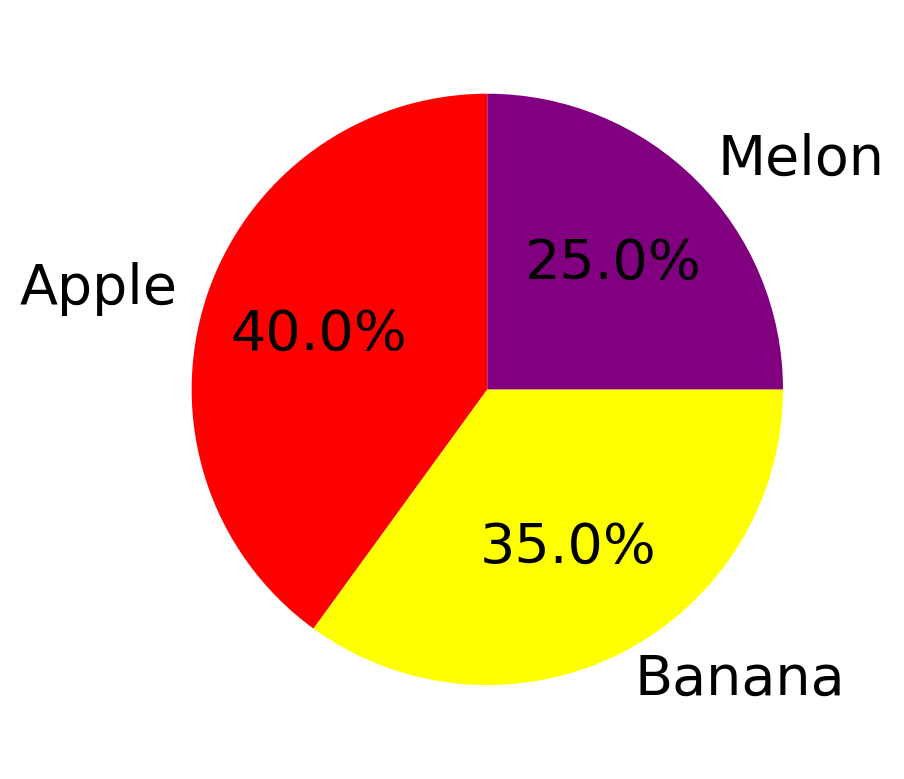

In [62]:
x = [40,35,25]
labels = ['Apple', 'Banana', 'Melon']
colors = ['red', 'yellow', 'purple']
plt.pie(x, labels=labels, autopct='%.1f%%', startangle=90, colors=colors,
       textprops={'fontsize':20})
plt.show()

## 1.6 그래프 커스터마이징
### 1.6.1. linestyle, linewidth, color, marker
### 1.6.2. text. annoatate
- 참고 : https://matplotlib.org/api/axes_api.html#text-and-annotations

In [80]:
# 한글 기본 설정
plt.rc('font', family='Malgun Gothic') #윈도우즈
#plt.rc('font', family='Apple Gothic') #맥OS
plt.rc('axes', unicode_minus = False) #축의 마이너스(-) 깨짐 방지

In [83]:
#warnings.filterwarnings(action='default') #워닝 띄우기

In [95]:
# 한글 특정 폰트 설정
from matplotlib.font_manager import FontProperties
font_file = 'C:/Windows/Fonts/HMKMMAG.TTF'
font_prop = FontProperties(fname=font_file, size=12)

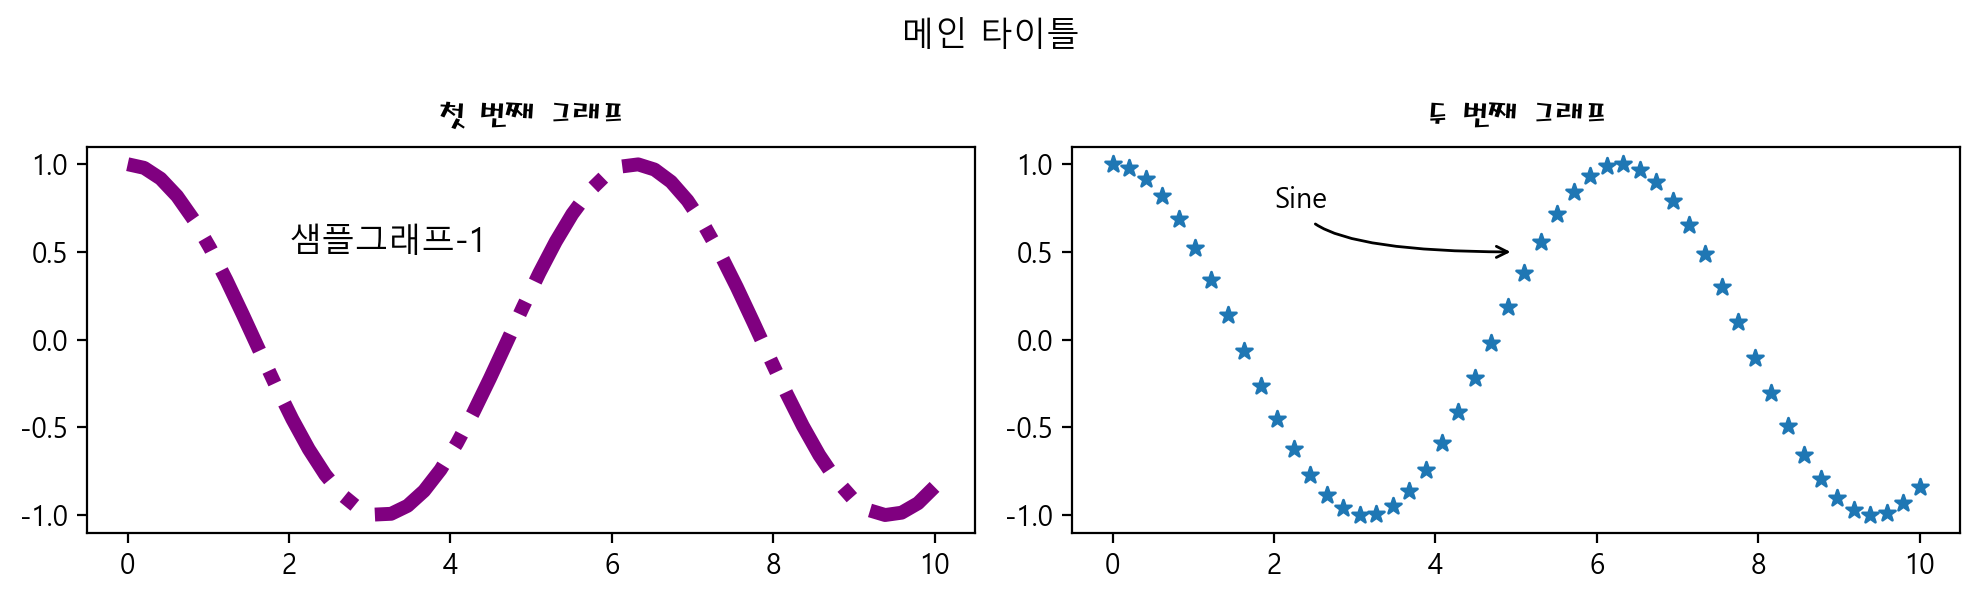

In [102]:
x=np.linspace(0,10)
y=np.cos(x)
fig, axes = plt.subplots(ncols=2, figsize=(10,3))

axes[0].plot(x, y, linewidth=5, linestyle='-.', color='purple')
#axes[0].text(2, 0.5, 'sample graph', fontsize = 12)
axes[0].text(2, 0.5, '샘플 그래프-1', fontsize = 12)
axes[0].set_title('첫 번째 그래프', fontproperties=font_prop)

axes[1].scatter(x, y, marker='*')
axes[1].annotate('Sine', xytext=(2, 0.75), #글자가 들어갈 좌표
                 xy=(5, 0.5), #화살표가 가리킬 좌표
                 arrowprops=dict(arrowstyle='->',
                                connectionstyle='angle3')
                )
axes[1].set_title('두 번째 그래프', fontproperties=font_prop)

plt.suptitle('메인 타이틀')
plt.tight_layout() #서브플롯 레이아웃 조정
plt.show()

### 1.6.3. 수학 기호
- 교안 p. 30 참고 : https://matplotlib.org/2.0.2/users/mathtext.html

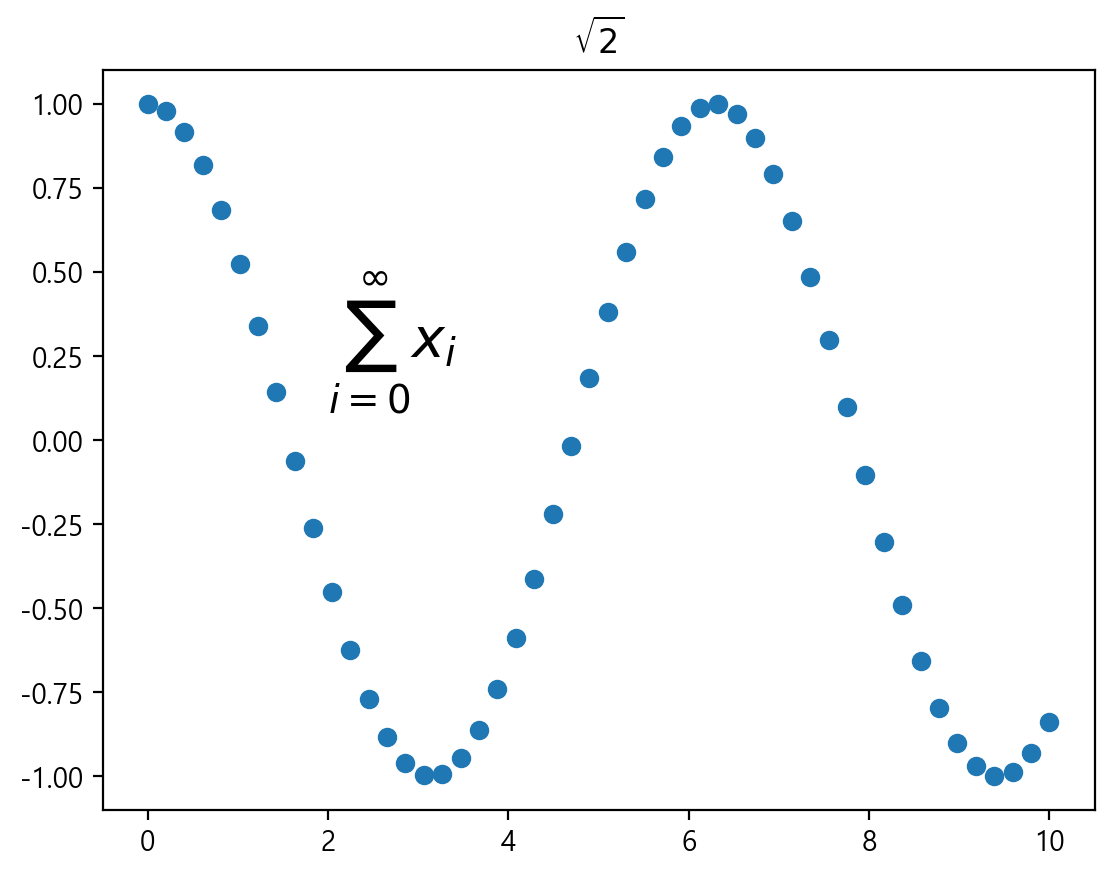

In [109]:
plt.scatter(x, y)
plt.text(2, 0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.title(r'$\sqrt{2}$')
plt.show()

### 1.6.4. 축과 눈금
- 교안 p.33 : https://matplotlib.org/3.1.0/api/axis_api.html

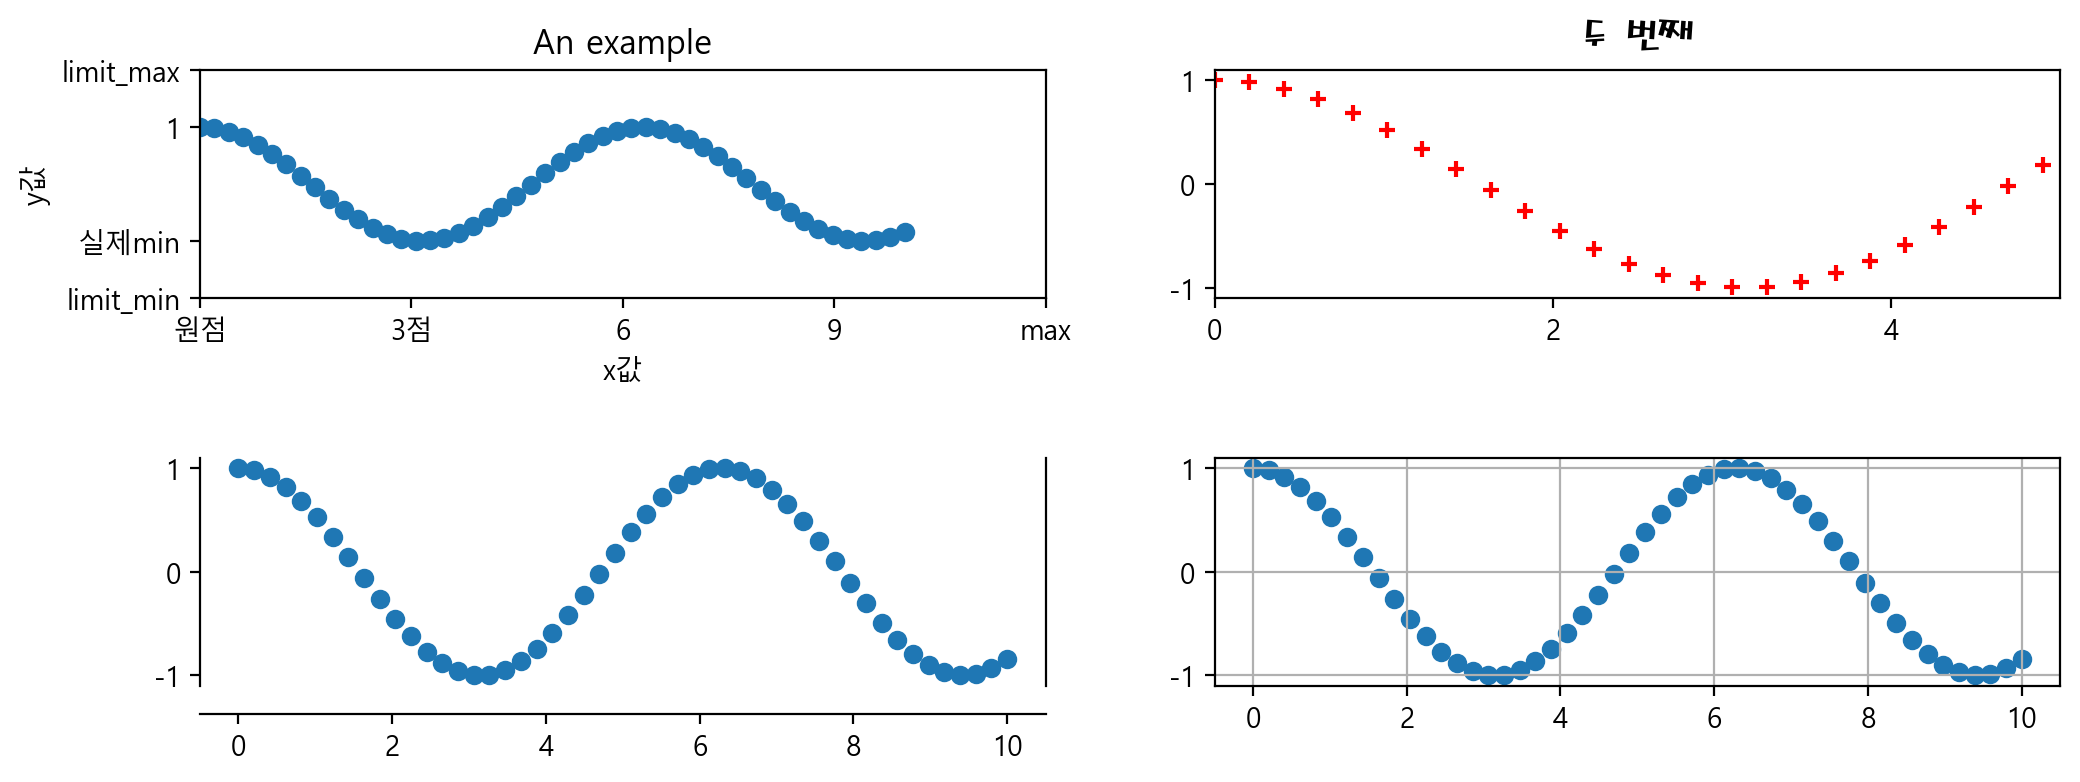

In [133]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,4))
#subplot 간 여백 조정(title, x축 label)
plt.subplots_adjust(hspace=0.7, #hspace : height 여백. 1은 subplot 높이
                    wspace=0.2) #wspace : width 여백, 1은 subplot 너비
axes[0,0].scatter(x,y)
axes[0,0].set(title = 'An example',
             ylabel = 'y값', xlabel='x값',
             xlim = [0, 12], #x축 눈금 범위
             xticks = [0, 3, 6, 9, 12], #x축 눈금 지정
             xticklabels = ['원점', '3점', 6, 9, 'max'], #x축 눈금 라벨
             ylim = [-2, 2],
             yticks = [-2, -1, 1, 2],
             yticklabels = ['limit_min', '실제min', 1, 'limit_max'])
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두 번째', fontproperties=font_prop, fontsize=15) #코드 따로 써야 해서 불편할 수 있지만, 폰트 지정 가능
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x,y)
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['bottom'].set_position(('outward', 10)) #10pt만큼 바깥쪽으로 아래 축 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 1.6.5. 축 공유 📌

In [134]:
x = np.arange(0,10)

In [135]:
y1 = 0.5 * x**2
y2 = -y1

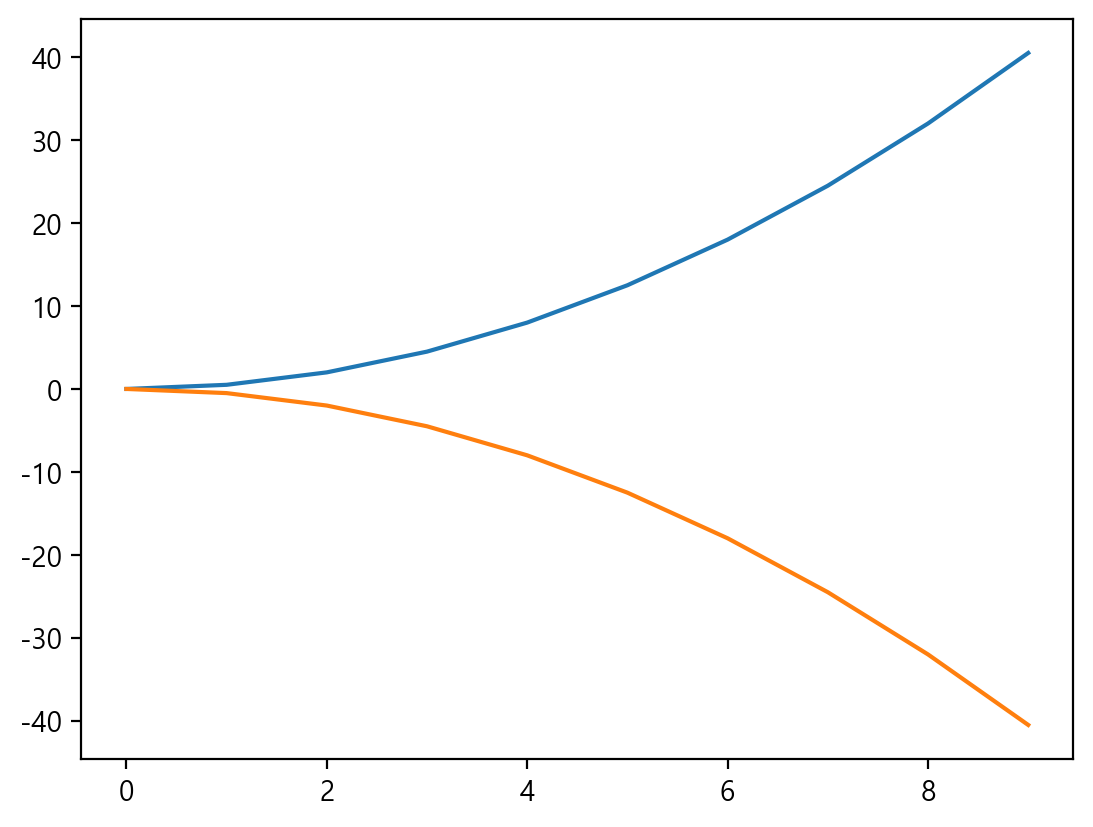

In [136]:
plt.plot(x, y1)
plt.plot(x, y2)

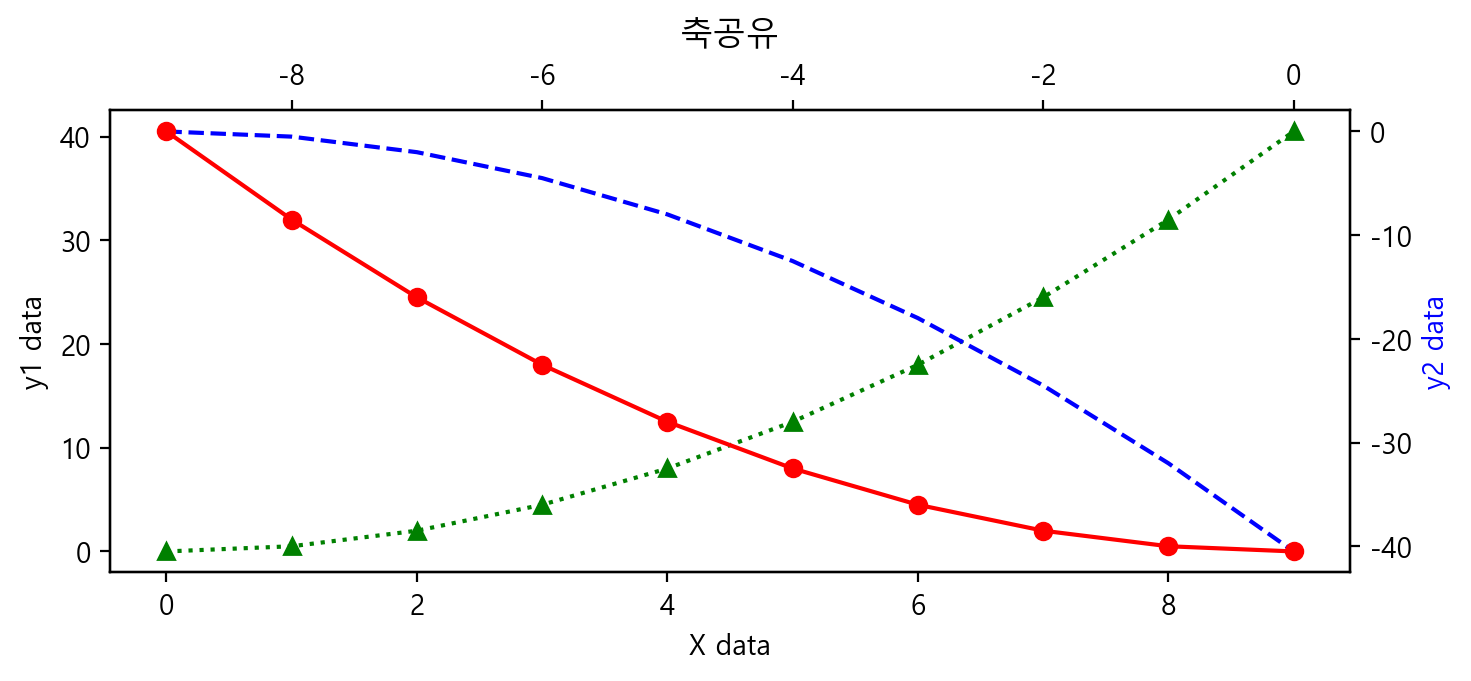

In [147]:
fig, ax1 = plt.subplots(figsize=(8,3))
ax1.plot(x,y1, 'g^:')
ax1.set(title='축공유', xlabel = 'X data', ylabel= 'y1 data')

ax2 = ax1.twinx() #ax1과 x축을 공유하는 ax2
ax2.plot(x,y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')

plt.show()

### 1.6.6. 범례 표시

### 1.6.7. 플롯 스타일 지정

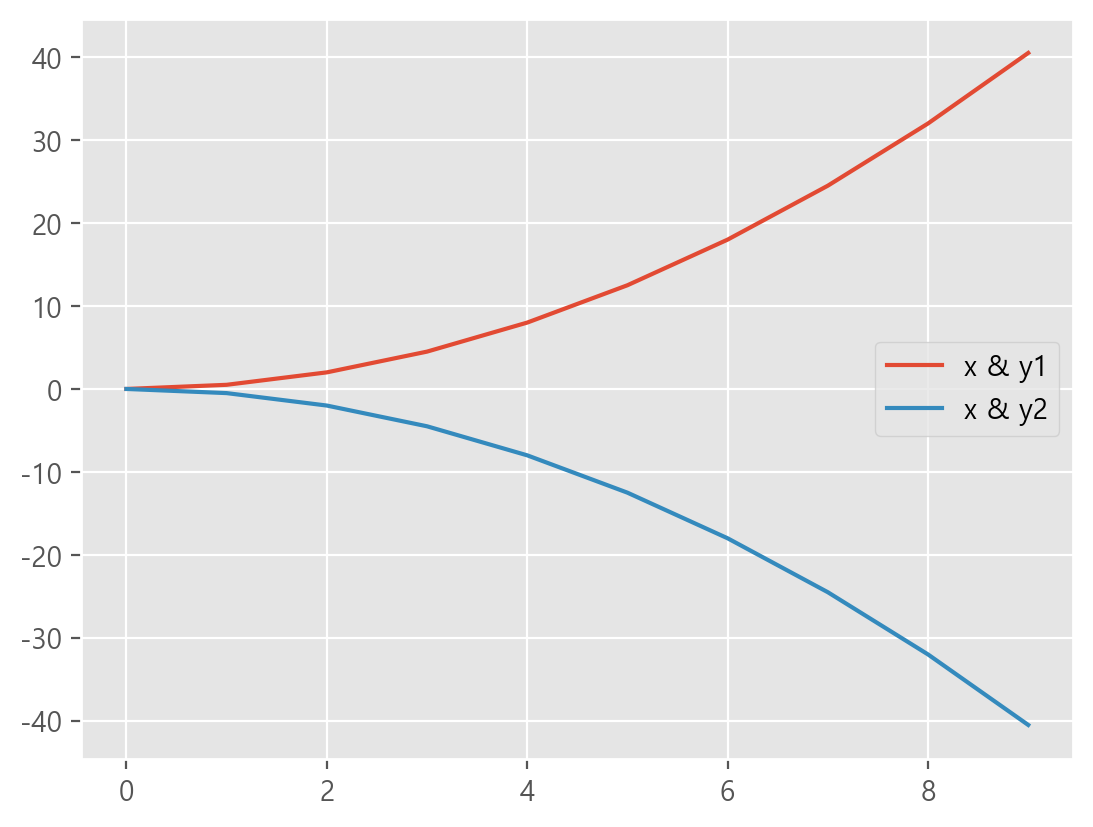

In [148]:
plt.style.use("ggplot") #default, ggplot, classic, ...
plt.plot(x, y1, label='x & y1')
plt.plot(x, y2, label='x & y2')
plt.legend(loc='center right')
plt.show()